# Importing required libraries

In [117]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [118]:
# Loading the dataset:
import pandas as pd
df = pd.read_csv(r'https://raw.githubusercontent.com/dsrscientist/DSData/master/Telecom_customer_churn.csv')

In [119]:
# Print all columns:
pd.set_option('display.max_columns',None)

In [120]:
# Showing 5 raws of dataframe:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [121]:
# Get the numbers of rows and columns:
df.shape

(7043, 21)

In [122]:
# Check column of the dataframe:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [123]:
# Get the column datatypes:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [124]:
# Basic information about dataset:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [125]:
# Get a count of the empty values for each column:
df.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [126]:
# Check any missing/null values in the dataset:
df.isnull().values.any()

False

<AxesSubplot:>

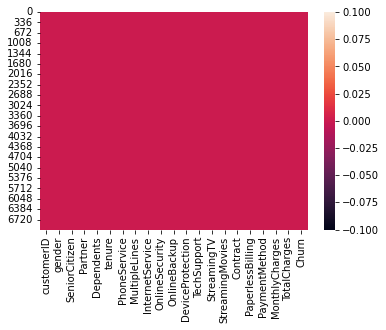

In [127]:
# Checking for null values using heatmap:
sns.heatmap(df.isnull())

In [128]:
# Print all of the data types and their unique values:
for column in df.columns:
    if df[column].dtype == object:
        print(str(column) + ' : ' + str(df[column].unique()))
        print(df[column].value_counts())
        print('____________________________________________')

customerID : ['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
7590-VHVEG    1
3791-LGQCY    1
6008-NAIXK    1
5956-YHHRX    1
5365-LLFYV    1
             ..
9796-MVYXX    1
2637-FKFSY    1
1552-AAGRX    1
4304-TSPVK    1
3186-AJIEK    1
Name: customerID, Length: 7043, dtype: int64
____________________________________________
gender : ['Female' 'Male']
Male      3555
Female    3488
Name: gender, dtype: int64
____________________________________________
Partner : ['Yes' 'No']
No     3641
Yes    3402
Name: Partner, dtype: int64
____________________________________________
Dependents : ['No' 'Yes']
No     4933
Yes    2110
Name: Dependents, dtype: int64
____________________________________________
PhoneService : ['No' 'Yes']
Yes    6361
No      682
Name: PhoneService, dtype: int64
____________________________________________
MultipleLines : ['No phone service' 'No' 'Yes']
No                  3390
Yes                 2971
No phone service     682
Name: Mu

# Data Analysis and Visualization

In [129]:
# Summary statistics:
df.describe().style.background_gradient()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


<AxesSubplot:xlabel='Churn', ylabel='count'>

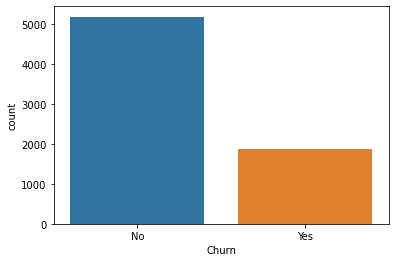

In [14]:
# Visualize the number of Customer Churn:
sns.countplot(df['Churn'])

Observation :- To see this from above graph that Churn No value is more than yes.

<AxesSubplot:xlabel='Churn', ylabel='count'>

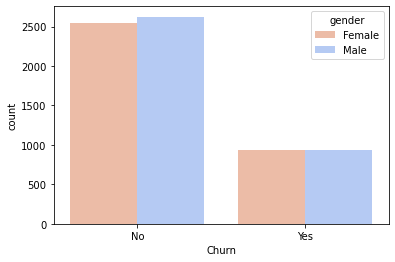

In [15]:
# gender and churn.
sns.countplot(x='Churn', data=df, hue='gender', palette="coolwarm_r")

Observation :- In this graph both gender has eqaullay that minor diff when customer churn has no

<AxesSubplot:xlabel='SeniorCitizen', ylabel='count'>

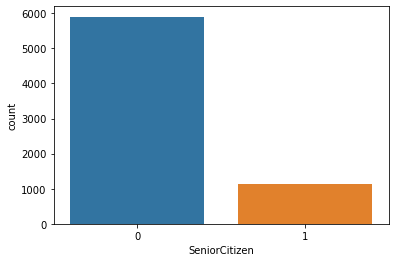

In [16]:
# Visualize the number of SeniorCitizen.
sns.countplot(df['SeniorCitizen'])

Observation :- In this graph SeniorCitizen value has less count.

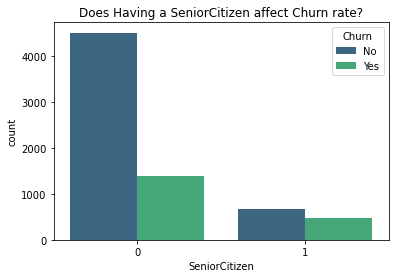

In [17]:
# SeniorCitizen vs Churn
fig_churn_phone_service = sns.countplot(x="SeniorCitizen",hue="Churn",data=df, palette='viridis')
fig_churn_phone_service.set_title("Does Having a SeniorCitizen affect Churn rate?")
plt.show()

Observation :- In this graph SC is not much affect the churn.

<AxesSubplot:xlabel='Partner', ylabel='count'>

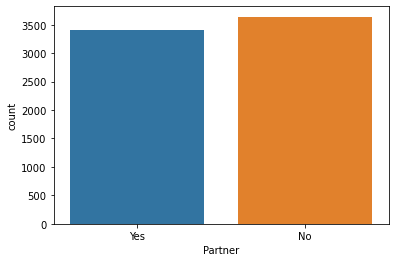

In [18]:
# Visualize the number of Partner.
sns.countplot(df['Partner'])

Observation :- In this graph without patner is littlebit more then with partner.

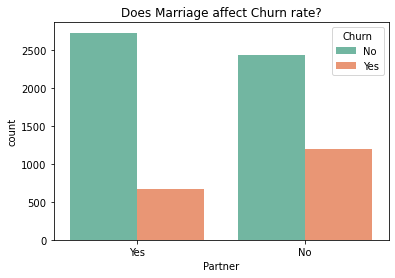

In [19]:
# partner vs churn.
fig_churn_partner = sns.countplot(x="Partner", hue="Churn", data=df, palette="Set2")
fig_churn_partner.set_title("Does Marriage affect Churn rate?")
plt.show()

<AxesSubplot:xlabel='Dependents', ylabel='count'>

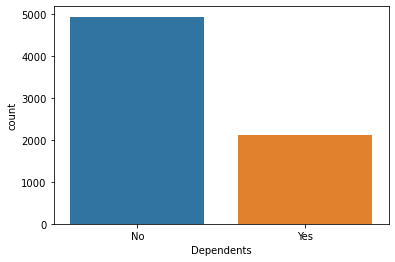

In [20]:
# Visualize the number of dependents.
sns.countplot(df['Dependents'])

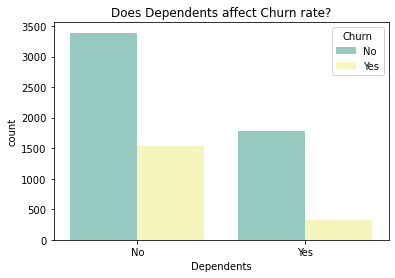

In [21]:
# Dependents vs Churn
fig_churn_phone_service = sns.countplot(x="Dependents",hue="Churn",data=df, palette='Set3')
fig_churn_phone_service.set_title("Does Dependents affect Churn rate?")
plt.show()

<AxesSubplot:xlabel='PhoneService', ylabel='count'>

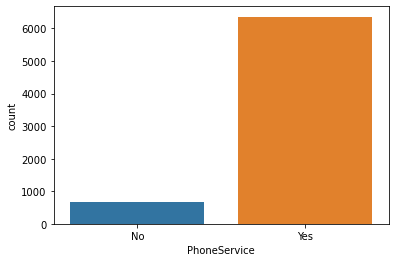

In [22]:
# Visualize the number of Phoneservice.
sns.countplot(df['PhoneService'])

<AxesSubplot:xlabel='Churn', ylabel='count'>

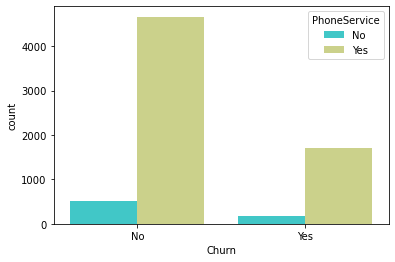

In [23]:
# PhoneService and churn.
sns.countplot(x='Churn', data=df, hue='PhoneService', palette="rainbow")

<AxesSubplot:xlabel='MultipleLines', ylabel='count'>

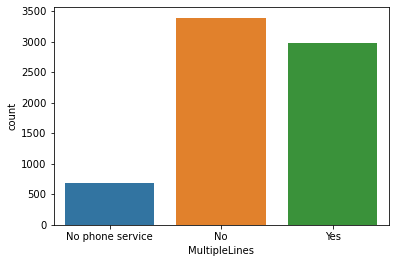

In [24]:
# Visualize the number of Multiplelines.
sns.countplot(df['MultipleLines'])

<AxesSubplot:xlabel='Churn', ylabel='count'>

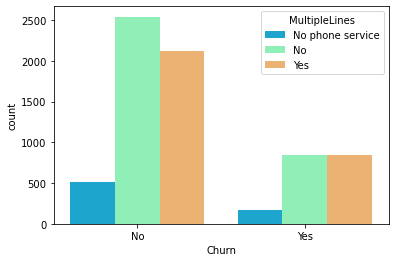

In [25]:
# MultipleLines and churn.
sns.countplot(x='Churn', data=df, hue='MultipleLines', palette="rainbow")

<AxesSubplot:xlabel='InternetService', ylabel='count'>

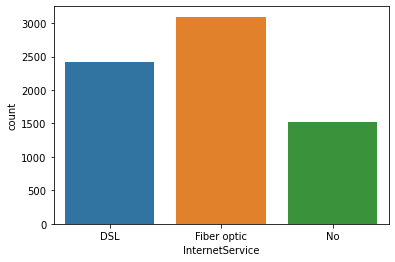

In [26]:
# Visualize the number of InternetService.
sns.countplot(df['InternetService'])

<AxesSubplot:xlabel='Churn', ylabel='count'>

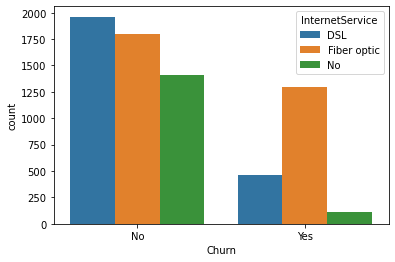

In [27]:
# display countplot for InternetService in churn:
sns.countplot(x='Churn',data=df, hue='InternetService')

[Text(0.5, 0, 'Tenure in Months'), Text(0, 0.5, 'Count')]

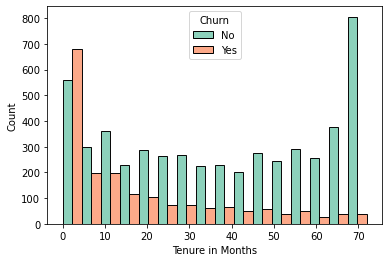

In [28]:
# display histplot for tenure in Churn:
ax = sns.histplot(x = 'tenure', hue = 'Churn', data = df, multiple='dodge', palette="Set2")
ax.set(xlabel="Tenure in Months", ylabel = "Count")

<AxesSubplot:xlabel='OnlineSecurity', ylabel='count'>

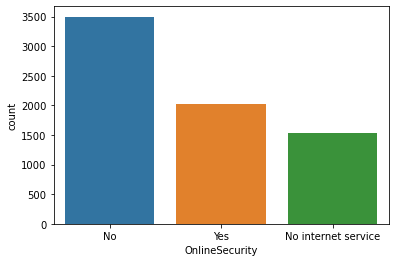

In [29]:
# Visualize the number of OnlineSecurity.
sns.countplot(df['OnlineSecurity'])

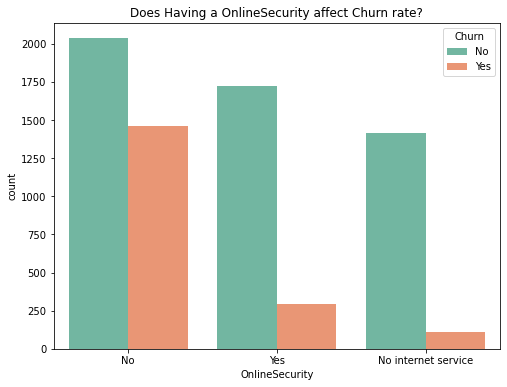

In [30]:
# OnlineSecurity vs Churn
f, ax = plt.subplots(figsize=(8,6))
fig_churn_phone_service = sns.countplot(x="OnlineSecurity",hue="Churn",data=df, palette='Set2')
fig_churn_phone_service.set_title("Does Having a OnlineSecurity affect Churn rate?")
plt.show()

<AxesSubplot:xlabel='OnlineBackup', ylabel='count'>

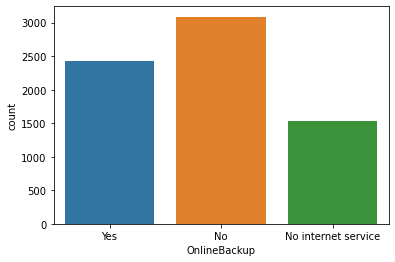

In [31]:
# Visualize the number of OnlineBackup.
sns.countplot(df['OnlineBackup'])

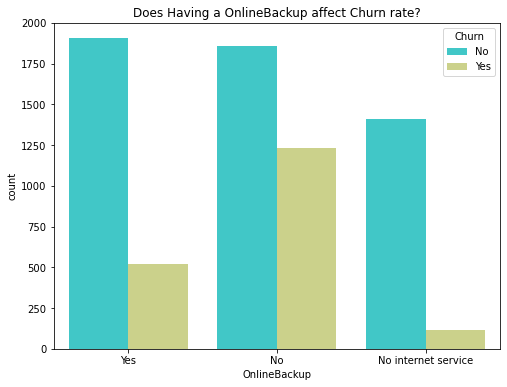

In [32]:
# OnlineBackup vs Churn
f, ax = plt.subplots(figsize=(8,6))
fig_churn_phone_service = sns.countplot(x="OnlineBackup",hue="Churn",data=df, palette='rainbow')
fig_churn_phone_service.set_title("Does Having a OnlineBackup affect Churn rate?")
plt.show()

<AxesSubplot:xlabel='DeviceProtection', ylabel='count'>

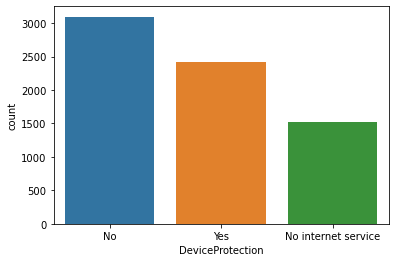

In [33]:
# Visualize the number of DeviceProtection.
sns.countplot(df['DeviceProtection'])

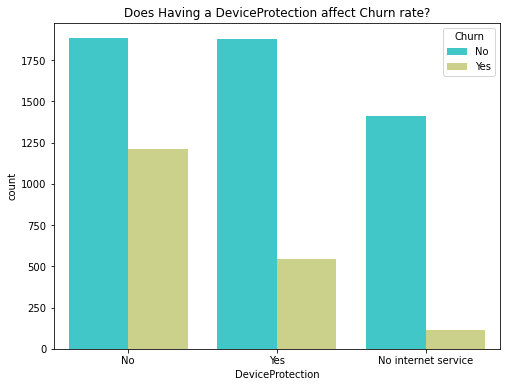

In [34]:
# DeviceProtection vs Churn
f, ax = plt.subplots(figsize=(8,6))
fig_churn_phone_service = sns.countplot(x="DeviceProtection",hue="Churn",data=df, palette='rainbow')
fig_churn_phone_service.set_title("Does Having a DeviceProtection affect Churn rate?")
plt.show()

<AxesSubplot:xlabel='TechSupport', ylabel='count'>

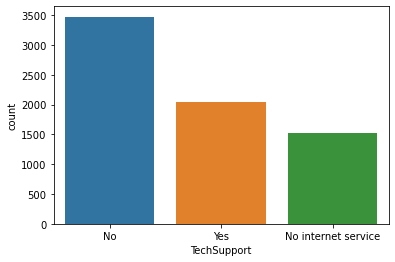

In [35]:
# Visualize the number of TechSupport.
sns.countplot(df['TechSupport'])

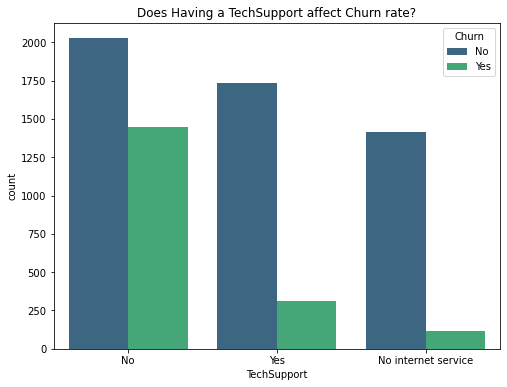

In [36]:
# TechSupport vs Churn
f, ax = plt.subplots(figsize=(8,6))
fig_churn_phone_service = sns.countplot(x="TechSupport",hue="Churn",data=df, palette='viridis')
fig_churn_phone_service.set_title("Does Having a TechSupport affect Churn rate?")
plt.show()

In [37]:
# Replace white space value of totalcharges column with Nan:
df['TotalCharges'] = df['TotalCharges'].replace(r'^\s*$', np.nan, regex=True)

In [38]:
# Replace Nan value of totalcharges column with mode:
from sklearn.impute import SimpleImputer
cat_imputer = SimpleImputer(strategy='most_frequent')
df[df.columns[df.dtypes=='object']] = cat_imputer.fit_transform(df[df.columns[df.dtypes=='object']])

In [39]:
# Convert totalcharges column into float type:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'])

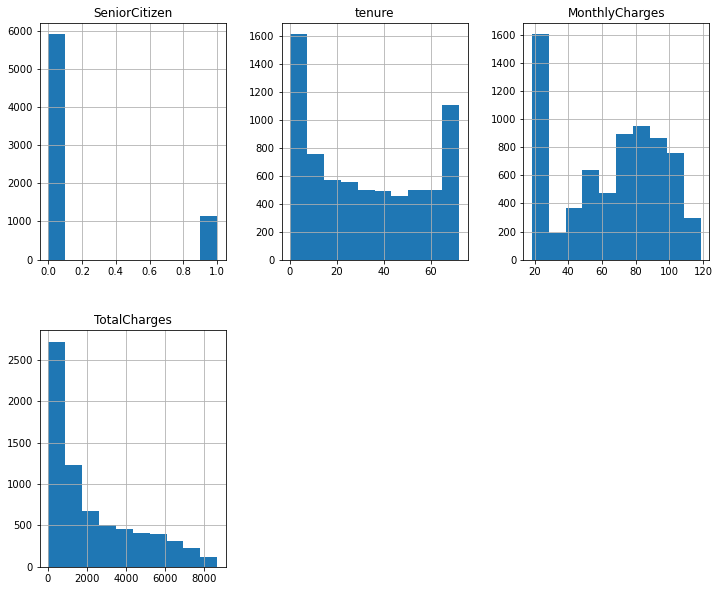

In [40]:
# Display histogram:
df.hist(figsize=(12,10), layout=(2,3), sharex=False);

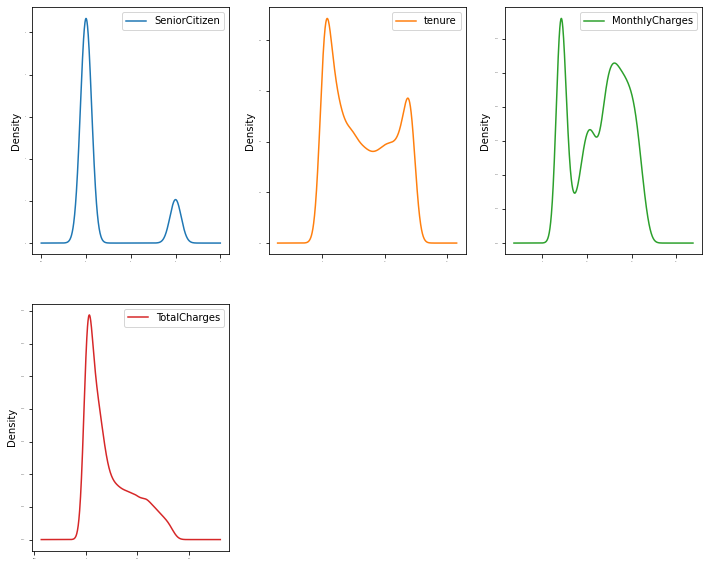

In [41]:
# Let's check desity plot:
df.plot(kind='density', subplots=True, layout=(2,3), sharex=False, legend=True, fontsize=1, figsize=(12,10))
plt.show()

<AxesSubplot:xlabel='tenure', ylabel='Density'>

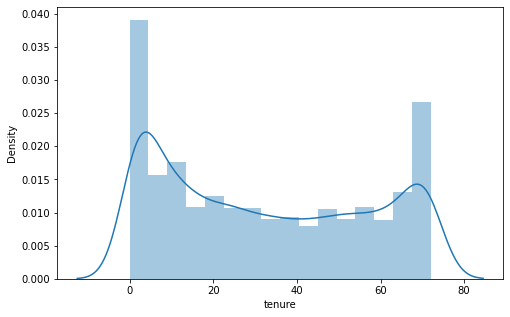

In [42]:
# Display distplot of tenure column:
plt.figure(figsize=(8,5))
sns.distplot(df['tenure'])

<AxesSubplot:xlabel='MonthlyCharges', ylabel='Density'>

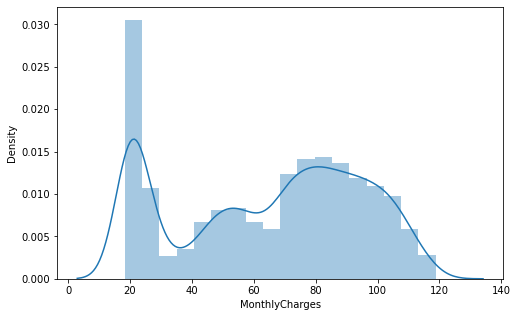

In [43]:
# Display distplot of monthly charges column:
plt.figure(figsize=(8,5))
sns.distplot(df['MonthlyCharges'])

# Remove skewness and outliers

In [44]:
# Check skewness:
df.skew().sort_values(ascending=False)

SeniorCitizen     1.833633
TotalCharges      0.963275
tenure            0.239540
MonthlyCharges   -0.220524
dtype: float64

In [45]:
# Remove skewness using log transform and sqrt method:
import numpy as np
df['SeniorCitizen']=np.sqrt(df['SeniorCitizen'])

In [46]:
# Check skewness:
df.skew().sort_values(ascending=False)

SeniorCitizen     1.833633
TotalCharges      0.963275
tenure            0.239540
MonthlyCharges   -0.220524
dtype: float64

In [47]:
# Dropping the Price column:
data = df.drop(["Churn"], axis=1)

In [48]:
# Here convert into Categorical Data and Numerical Data:
categorical_data = data.select_dtypes(exclude=['int64', 'float','int32'])
numerical_data = data.select_dtypes(include=['int64', 'float','int32'])

In [49]:
categorical_data.head()

,customerID,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod
0,7590-VHVEG,Female,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check
1,5575-GNVDE,Male,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check
2,3668-QPYBK,Male,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check
3,7795-CFOCW,Male,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic)
4,9237-HQITU,Female,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check


In [50]:
numerical_data.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
0,0.0,1,29.85,29.85
1,0.0,34,56.95,1889.50
2,0.0,2,53.85,108.15
3,0.0,45,42.30,1840.75
4,0.0,2,70.70,151.65


SeniorCitizen        AxesSubplot(0.125,0.536818;0.352273x0.343182)
tenure            AxesSubplot(0.547727,0.536818;0.352273x0.343182)
MonthlyCharges          AxesSubplot(0.125,0.125;0.352273x0.343182)
TotalCharges         AxesSubplot(0.547727,0.125;0.352273x0.343182)
dtype: object

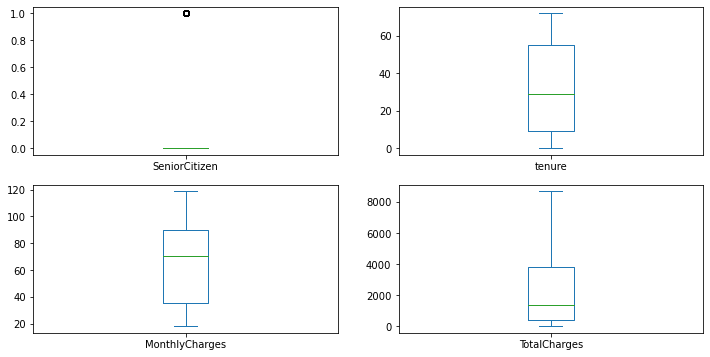

In [54]:
# Checking outliers with boxplot:
numerical_data.plot(kind='box', subplots=True, layout=(2,2), figsize=(12,6))

In [55]:
# Lets quantify:
from scipy.stats import zscore
(np.abs(zscore(numerical_data))<3).all()

SeniorCitizen     True
tenure            True
MonthlyCharges    True
TotalCharges      True
dtype: bool

In [56]:
# Detecting outliers:
from scipy.stats import zscore
z = np.abs(zscore(numerical_data))
print(np.where(z>3))

(array([], dtype=int64), array([], dtype=int64))


#### no outlier detected on numeric columns.

In [57]:
# Here Converting yes/no to 1/0 values with LabelEncoder:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder() 
list1 = ["gender","Partner","Dependents","Churn","PhoneService","MultipleLines","InternetService","OnlineSecurity","OnlineBackup","DeviceProtection","TechSupport","StreamingTV","StreamingMovies","PaperlessBilling","Contract","PaymentMethod",]
for val in list1:
    df[val] = le.fit_transform(df[val].astype(str))
    
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,0,0.0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85,0
1,5575-GNVDE,1,0.0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50,0
2,3668-QPYBK,1,0.0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15,1
3,7795-CFOCW,1,0.0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75,0
4,9237-HQITU,0,0.0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,1


### Correlation:

In [58]:
# Correlation of data:
corr = df.corr(method='pearson')
corr

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
gender,1.000000,-0.001874,-0.001808,0.010517,0.005106,-0.006488,-0.006739,-0.000863,-0.015017,-0.012057,0.000549,-0.006825,-0.006421,-0.008743,0.000126,-0.011754,0.017352,-0.014569,-0.000079,-0.008612
SeniorCitizen,-0.001874,1.000000,0.016479,-0.211185,0.016567,0.008576,0.146185,-0.032310,-0.128221,-0.013632,-0.021398,-0.151268,0.030776,0.047266,-0.142554,0.156530,-0.038551,0.220173,0.103001,0.150889
Partner,-0.001808,0.016479,1.000000,0.452676,0.379697,0.017706,0.142410,0.000891,0.150828,0.153130,0.166330,0.126733,0.137341,0.129574,0.294806,-0.014877,-0.154798,0.096848,0.317518,-0.150448
Dependents,0.010517,-0.211185,0.452676,1.000000,0.159712,-0.001762,-0.024991,0.044590,0.152166,0.091015,0.080537,0.133524,0.046885,0.021321,0.243187,-0.111377,-0.040292,-0.113890,0.062100,-0.164221
tenure,0.005106,0.016567,0.379697,0.159712,1.000000,0.008448,0.343032,-0.030359,0.325468,0.370876,0.371105,0.322942,0.289373,0.296866,0.671607,0.006152,-0.370436,0.247900,0.826172,-0.352229
PhoneService,-0.006488,0.008576,0.017706,-0.001762,0.008448,1.000000,-0.020538,0.387436,-0.015198,0.024105,0.003727,-0.019158,0.055353,0.043870,0.002247,0.016505,-0.004184,0.247398,0.113211,0.011942
MultipleLines,-0.006739,0.146185,0.142410,-0.024991,0.343032,-0.020538,1.000000,-0.109216,0.007141,0.117327,0.122318,0.011466,0.175059,0.180957,0.110842,0.165146,-0.176793,0.433576,0.452583,0.038037
InternetService,-0.000863,-0.032310,0.000891,0.044590,-0.030359,0.387436,-0.109216,1.000000,-0.028416,0.036138,0.044944,-0.026047,0.107417,0.098350,0.099721,-0.138625,0.086140,-0.323260,-0.175753,-0.047291
OnlineSecurity,-0.015017,-0.128221,0.150828,0.152166,0.325468,-0.015198,0.007141,-0.028416,1.000000,0.185126,0.175985,0.285028,0.044669,0.055954,0.374416,-0.157641,-0.096726,-0.053878,0.253235,-0.289309
OnlineBackup,-0.012057,-0.013632,0.153130,0.091015,0.370876,0.024105,0.117327,0.036138,0.185126,1.000000,0.187757,0.195748,0.147186,0.136722,0.280980,-0.013370,-0.124847,0.119777,0.374421,-0.195525


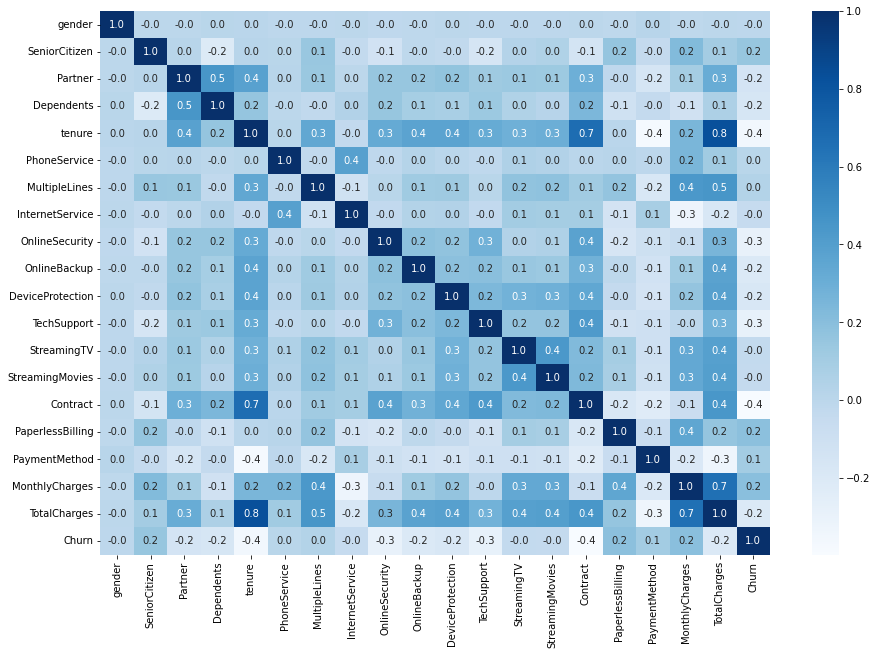

In [71]:
# Display heatmap:
plt.figure(figsize = (15,10))
sns.heatmap(df.corr(), annot = True, cmap = "Blues", fmt='.1f')
plt.show()

#### Observation :- here partner and dependent has correlate with each other. Tenure and Contract highly neg. correlate with churn

# MultiCollinearity with Variance Inflation Factor (VIF)

In [60]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [61]:
X = df.drop(columns=['customerID','Churn'],axis=1)
Y = df[['customerID','Churn']]

In [62]:
def calc_vif():
    vif = pd.DataFrame()
    vif['Features'] = X.columns
    vif['VIF Factor'] = [variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
    print(vif)

In [63]:
calc_vif()

            Features  VIF Factor
0             gender    1.954598
1      SeniorCitizen    1.369687
2            Partner    2.821595
3         Dependents    1.964242
4             tenure   14.907419
5       PhoneService   15.138384
6      MultipleLines    2.752987
7    InternetService    4.352776
8     OnlineSecurity    2.249503
9       OnlineBackup    2.456184
10  DeviceProtection    2.632381
11       TechSupport    2.383056
12       StreamingTV    3.240303
13   StreamingMovies    3.262477
14          Contract    4.164029
15  PaperlessBilling    2.872168
16     PaymentMethod    3.097840
17    MonthlyCharges   20.455681
18      TotalCharges   13.822160


In [77]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,0,0.0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85,0
1,5575-GNVDE,1,0.0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50,0
2,3668-QPYBK,1,0.0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15,1
3,7795-CFOCW,1,0.0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75,0
4,9237-HQITU,0,0.0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,1


# Data Preprocessing

In [82]:
x = df.drop(columns=['customerID','Churn'],axis=1)
y = df['Churn']

In [83]:
x.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,0,0.0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85
1,1,0.0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50
2,1,0.0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15
3,1,0.0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75
4,0,0.0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65


In [84]:
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Churn, dtype: int32

In [85]:
print(x.shape, y.shape)

(7043, 19) (7043,)


# Scaling the data

In [86]:
from sklearn.preprocessing import StandardScaler

In [87]:
scaler=StandardScaler()
x_scaled=scaler.fit_transform(x)
x_scaled

array([[-1.00955867, -0.43991649,  1.03453023, ...,  0.39855772,
        -1.16032292, -0.99263828],
       [ 0.99053183, -0.43991649, -0.96662231, ...,  1.33486261,
        -0.25962894, -0.17218103],
       [ 0.99053183, -0.43991649, -0.96662231, ...,  1.33486261,
        -0.36266036, -0.95809317],
       ...,
       [-1.00955867, -0.43991649,  1.03453023, ...,  0.39855772,
        -1.1686319 , -0.85295782],
       [ 0.99053183,  2.27315869,  1.03453023, ...,  1.33486261,
         0.32033821, -0.8705392 ],
       [ 0.99053183, -0.43991649, -0.96662231, ..., -1.47405205,
         1.35896134,  2.0139108 ]])

# Since the outcome has only two variables we will use binary classification model.

In [88]:
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()

from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()

from sklearn.svm import SVC
svc = SVC()

from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Training process begins

#### Finding best random_state

In [89]:
model = [lr,rfc,dtc,svc,gnb]
maxAcc_score = 0
for r_state in range(0,100):
    x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=.20,random_state = r_state)
    for i in model:
        i.fit(x_train,y_train)
        pred_test = i.predict(x_test)
        acc_sc = accuracy_score(y_test,pred_test)
        print("Accuracy score correspond to random state ",r_state,"is",acc_sc)
        if acc_sc > maxAcc_score:
            maxAcc_score = acc_sc
            final_state = r_state
            final_model = i

Accuracy score correspond to random state  0 is 0.7885024840312278
Accuracy score correspond to random state  0 is 0.7806955287437899
Accuracy score correspond to random state  0 is 0.7189496096522356
Accuracy score correspond to random state  0 is 0.7388218594748048
Accuracy score correspond to random state  0 is 0.7374024130589071
Accuracy score correspond to random state  1 is 0.8048261178140526
Accuracy score correspond to random state  1 is 0.8062455642299503
Accuracy score correspond to random state  1 is 0.7310149041873669
Accuracy score correspond to random state  1 is 0.7530163236337828
Accuracy score correspond to random state  1 is 0.7686302342086586
Accuracy score correspond to random state  2 is 0.8026969481902059
Accuracy score correspond to random state  2 is 0.7899219304471257
Accuracy score correspond to random state  2 is 0.7452093683463449
Accuracy score correspond to random state  2 is 0.7530163236337828
Accuracy score correspond to random state  2 is 0.746628814762

Accuracy score correspond to random state  24 is 0.7501774308019872
Accuracy score correspond to random state  24 is 0.7650816181689141
Accuracy score correspond to random state  25 is 0.7977288857345636
Accuracy score correspond to random state  25 is 0.7856635911994322
Accuracy score correspond to random state  25 is 0.7466288147622427
Accuracy score correspond to random state  25 is 0.7281760113555713
Accuracy score correspond to random state  25 is 0.7643718949609652
Accuracy score correspond to random state  26 is 0.7991483321504613
Accuracy score correspond to random state  26 is 0.7899219304471257
Accuracy score correspond to random state  26 is 0.7366926898509581
Accuracy score correspond to random state  26 is 0.7444996451383961
Accuracy score correspond to random state  26 is 0.7487579843860894
Accuracy score correspond to random state  27 is 0.7963094393186657
Accuracy score correspond to random state  27 is 0.78708303761533
Accuracy score correspond to random state  27 is 0

Accuracy score correspond to random state  49 is 0.8019872249822569
Accuracy score correspond to random state  49 is 0.7281760113555713
Accuracy score correspond to random state  49 is 0.7310149041873669
Accuracy score correspond to random state  49 is 0.7608232789212207
Accuracy score correspond to random state  50 is 0.7920511000709723
Accuracy score correspond to random state  50 is 0.7970191625266146
Accuracy score correspond to random state  50 is 0.7338537970191625
Accuracy score correspond to random state  50 is 0.7388218594748048
Accuracy score correspond to random state  50 is 0.7565649396735273
Accuracy score correspond to random state  51 is 0.7970191625266146
Accuracy score correspond to random state  51 is 0.7877927608232789
Accuracy score correspond to random state  51 is 0.7175301632363378
Accuracy score correspond to random state  51 is 0.7416607523066004
Accuracy score correspond to random state  51 is 0.7459190915542938
Accuracy score correspond to random state  52 is

Accuracy score correspond to random state  73 is 0.7629524485450674
Accuracy score correspond to random state  73 is 0.759403832505323
Accuracy score correspond to random state  74 is 0.8055358410220014
Accuracy score correspond to random state  74 is 0.7927608232789212
Accuracy score correspond to random state  74 is 0.7452093683463449
Accuracy score correspond to random state  74 is 0.7352732434350603
Accuracy score correspond to random state  74 is 0.7537260468417317
Accuracy score correspond to random state  75 is 0.7991483321504613
Accuracy score correspond to random state  75 is 0.7998580553584103
Accuracy score correspond to random state  75 is 0.7040454222853088
Accuracy score correspond to random state  75 is 0.7267565649396736
Accuracy score correspond to random state  75 is 0.758694109297374
Accuracy score correspond to random state  76 is 0.8076650106458482
Accuracy score correspond to random state  76 is 0.7991483321504613
Accuracy score correspond to random state  76 is 0

Accuracy score correspond to random state  98 is 0.8076650106458482
Accuracy score correspond to random state  98 is 0.7508871540099361
Accuracy score correspond to random state  98 is 0.7572746628814763
Accuracy score correspond to random state  98 is 0.7551454932576295
Accuracy score correspond to random state  99 is 0.7998580553584103
Accuracy score correspond to random state  99 is 0.7814052519517388
Accuracy score correspond to random state  99 is 0.71611071682044
Accuracy score correspond to random state  99 is 0.7260468417317246
Accuracy score correspond to random state  99 is 0.7416607523066004


In [90]:
print("max Accuracy score correspond to random state ",final_state,"is",maxAcc_score,"and model is",final_model)

max Accuracy score correspond to random state  92 is 0.8232789212207239 and model is LogisticRegression()


# Creating train-test split

In [91]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=.20,random_state = 92)

In [92]:
x_train

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
4645,0,0.0,1,0,33,1,2,1,0,2,2,0,2,2,0,1,2,104.40,3409.60
1712,0,0.0,0,0,29,1,2,0,0,2,0,0,0,0,1,1,2,55.25,1620.20
6436,0,0.0,0,0,70,1,0,0,2,0,2,2,2,2,2,0,0,79.60,5589.45
567,1,0.0,1,0,71,1,2,0,2,2,0,2,2,0,2,0,1,73.50,5357.75
655,1,0.0,0,0,10,1,0,1,0,0,0,2,2,2,0,1,1,95.10,865.10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
710,1,0.0,0,0,1,1,0,2,1,1,1,1,1,1,0,0,3,19.55,19.55
6162,0,1.0,1,0,60,0,1,0,0,2,0,0,2,2,2,1,1,49.45,2907.55
6979,1,0.0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,3,24.20,24.20
4138,0,0.0,0,0,1,1,0,1,0,0,2,0,2,0,0,1,2,85.45,85.45


In [93]:
x_test

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
6059,0,0.0,0,0,39,0,1,0,2,2,0,2,0,0,1,1,0,40.30,1630.40
2795,0,1.0,0,0,9,1,2,1,0,0,0,0,0,0,0,1,2,74.55,622.90
958,1,0.0,0,0,25,1,2,0,2,2,2,2,0,2,0,0,0,81.75,2028.80
1111,0,0.0,0,0,4,1,0,1,2,0,2,2,0,2,0,1,0,94.40,387.20
2270,0,1.0,0,0,3,1,0,1,0,0,2,0,2,0,0,1,2,86.85,220.95
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4195,0,1.0,0,0,45,1,2,0,2,0,0,2,0,2,0,1,2,70.05,3062.45
6472,0,0.0,1,1,60,1,2,1,2,2,0,0,2,0,1,0,0,94.15,5811.80
1656,0,0.0,0,0,53,1,2,1,2,2,2,0,0,0,0,0,2,90.80,4921.20
5252,1,1.0,1,0,71,1,2,1,2,2,2,0,2,2,0,1,2,107.50,7713.55


In [94]:
y_train

4645    1
1712    0
6436    0
567     0
655     0
       ..
710     1
6162    0
6979    0
4138    1
4218    0
Name: Churn, Length: 5634, dtype: int32

In [95]:
y_test

6059    0
2795    1
958     0
1111    1
2270    1
       ..
4195    0
6472    0
1656    0
5252    0
2351    0
Name: Churn, Length: 1409, dtype: int32

In [96]:
print(x.shape, x_train.shape, x_test.shape)

(7043, 19) (5634, 19) (1409, 19)


In [97]:
print(y.shape, y_train.shape, y_test.shape)

(7043,) (5634,) (1409,)


#### Apply Best Model:

In [98]:
lr.fit(x_train,y_train)
pred = lr.predict(x_test)
print("accuracy score is:",accuracy_score(y_test,pred))
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

accuracy score is: 0.8232789212207239
[[945  96]
 [153 215]]
              precision    recall  f1-score   support

           0       0.86      0.91      0.88      1041
           1       0.69      0.58      0.63       368

    accuracy                           0.82      1409
   macro avg       0.78      0.75      0.76      1409
weighted avg       0.82      0.82      0.82      1409



In [99]:
from sklearn.metrics import f1_score
print('F1 score is: ', f1_score(y_test, pred))

F1 score is:  0.6332842415316642


# Cross Validation of the model

In [100]:
from sklearn.model_selection import cross_val_score
lss = accuracy_score(y_test,pred)
for i in range(2,10):
    lsscore = cross_val_score(lr,x,y,cv=i)
    lsc = lsscore.mean()
    print("At cv:-",i)
    print("cross validation score is :-",lsc*100)
    print("accuracy_score is :-",lss*100)
    print("\n")

At cv:- 2
cross validation score is :- 79.93750807397039
accuracy_score is :- 82.32789212207238


At cv:- 3
cross validation score is :- 79.93753186193206
accuracy_score is :- 82.32789212207238


At cv:- 4
cross validation score is :- 80.02280309483247
accuracy_score is :- 82.32789212207238


At cv:- 5
cross validation score is :- 80.06543768952834
accuracy_score is :- 82.32789212207238


At cv:- 6
cross validation score is :- 79.83831263043696
accuracy_score is :- 82.32789212207238


At cv:- 7
cross validation score is :- 80.05114440326405
accuracy_score is :- 82.32789212207238


At cv:- 8
cross validation score is :- 80.03713174594985
accuracy_score is :- 82.32789212207238


At cv:- 9
cross validation score is :- 80.20751788230794
accuracy_score is :- 82.32789212207238




In [101]:
lsscore_selected = cross_val_score(lr,x,y,cv=9).mean()
print("The cv score is: ",lsscore_selected,"\nThe accuracy score is: ",lss)

The cv score is:  0.8020751788230794 
The accuracy score is:  0.8232789212207239


# Hypertuning of the model:

In [105]:
from sklearn.model_selection import RandomizedSearchCV

parameters = [    
    {'penalty' : ['l1', 'l2', 'elasticnet', 'none'],
    'C' : np.logspace(-4, 4, 20),
    'solver' : ['lbfgs','newton-cg','liblinear','sag','saga'],
    'max_iter' : [100, 1000,2500, 5000]
    }
]

In [107]:
lr_random = RandomizedSearchCV(estimator = lr, param_distributions = parameters, scoring='neg_mean_squared_error', n_iter = 10, cv = 9, verbose=2, random_state=95, n_jobs = 1)
lr_random.fit(x_train,y_train)

Fitting 9 folds for each of 10 candidates, totalling 90 fits
[CV] END C=1438.44988828766, max_iter=5000, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=1438.44988828766, max_iter=5000, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=1438.44988828766, max_iter=5000, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=1438.44988828766, max_iter=5000, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=1438.44988828766, max_iter=5000, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=1438.44988828766, max_iter=5000, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=1438.44988828766, max_iter=5000, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=1438.44988828766, max_iter=5000, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=1438.44988828766, max_iter=5000, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=545.5594781168514, max_iter=2500, penalty=l1, solver=ne

[CV] END C=11.288378916846883, max_iter=2500, penalty=l2, solver=liblinear; total time=   0.0s


RandomizedSearchCV(cv=9, estimator=LogisticRegression(), n_jobs=1,
                   param_distributions=[{'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                         'max_iter': [100, 1000, 2500, 5000],
                                         'penalty': ['l1', 'l2', 'elasticnet',
                                                     'none'],
                                         'solver': ['lbfgs', 'newton-cg',
                                                    'liblinear', 'sag',
                                                    'saga']}],
                   random_state=95, scoring='neg_mean_squared_error',
                   verbose=2)

In [108]:
lr_random.best_params_

{'solver': 'liblinear',
 'penalty': 'l2',
 'max_iter': 2500,
 'C': 11.288378916846883}

In [110]:
lr = LogisticRegression(solver='liblinear', penalty='l2', max_iter=2500, C=11.288378916846883)
lr.fit(x_train,y_train)
lr.score(x_train,y_train)
pred_decision = lr.predict(x_test)

acc = accuracy_score(y_test,pred_decision)
print("Accuracy score:",acc*100)

cvscore = cross_val_score(lr,x,y,cv=9)
cv = cvscore.mean()
print("Cross Val Score is",cv*100)

Accuracy score: 82.11497515968772
Cross Val Score is 80.26420703954487


# ROC AUC Plot:

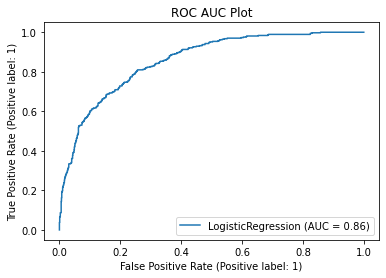

In [113]:
from sklearn.metrics import plot_roc_curve
plot_roc_curve(lr_random.best_estimator_,x_test,y_test)
plt.title("ROC AUC Plot")
plt.show()

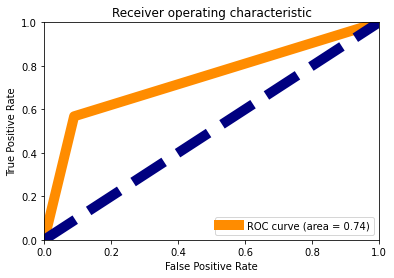

In [114]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, threshold = roc_curve(y_test,pred_decision)
roc_auc = auc(fpr,tpr)

plt.figure()
plt.plot(fpr,tpr,color = 'darkorange', lw=10, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0,1],[0,1], color='navy', lw=10, linestyle='--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc='lower right')
plt.show()

# Model Saving:

In [115]:
import pickle
filename = 'customer_churn.pkl'
pickle.dump(lr,open(filename,'wb'))

# Conclusion:

In [116]:
import numpy as np
a = np.array(y_test)
#predicted = np.array(ls.predict(x_test))
df_comp = pd.DataFrame({'original':a,'predicted':pred_decision},index=range(len(a)))
df_comp

,original,predicted
0,0,0
1,1,1
2,0,0
3,1,0
4,1,1
...,...,...
1404,0,0
1405,0,0
1406,0,0
1407,0,0
